---

# Feature Engineering Analysis

## Introduction

### Overview

Feature engineering is a crucial step in the data science pipeline that involves transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy. This notebook focuses on the feature engineering process for a dataset related to transactional data, with the goal of preparing the data for predictive modeling tasks, such as fraud detection.

### Objectives

1. **Data Loading and Preprocessing**:
   - Load the dataset from a CSV file.
   - Convert certain columns to appropriate data types.
   - Handle missing values and outliers.

2. **Feature Encoding**:
   - Encode boolean features to integer values.
   - Apply one-hot encoding to categorical features.
   - Apply label encoding to specific categorical columns.

3. **Feature Scaling**:
   - Normalize and standardize numerical features to ensure they are on a similar scale.

4. **Class Balancing**:
   - Balance the class distribution to address class imbalance, which is common in fraud detection datasets.

5. **Feature Importance Analysis**:
   - Calculate Information Value (IV) and Weight of Evidence (WoE) for each feature.
   - Identify and drop features with low predictive power.

6. **Data Visualization**:
   - Visualize the class distribution before and after balancing.
   - Plot the distribution of key features to understand their characteristics.

### Step-by-Step Analysis

1. **Data Loading and Preprocessing**:
   - Load the dataset from a CSV file.
   - Convert the `TransactionStartTime` column to a datetime type.
   - Convert certain columns to object type to ensure they are treated as categorical variables.
   - Check for and handle missing values and outliers.

2. **Feature Encoding**:
   - Encode boolean features to integer values.
   - Apply one-hot encoding to categorical features to convert them into a format suitable for machine learning models.
   - Apply label encoding to specific categorical columns to convert them into numerical values.

3. **Feature Scaling**:
   - Normalize specified columns to a range between 0 and 1.
   - Standardize specified columns to have a mean of 0 and a standard deviation of 1.

4. **Class Balancing**:
   - Use Random Over-Sampling (ROS) to increase the number of instances in the minority class.
   - Use Random Under-Sampling (RUS) to reduce the number of instances in the majority class.
   - Visualize the class distribution before and after balancing to ensure the classes are balanced.

5. **Feature Importance Analysis**:
   - Calculate the Information Value (IV) and Weight of Evidence (WoE) for each feature.
   - Summarize the results and identify features with low predictive power.
   - Drop features with low IV to reduce dimensionality and improve model performance.

6. **Data Visualization**:
   - Plot the class distribution before and after balancing to visualize the changes.
   - Plot the distribution of key features to understand their characteristics and identify any patterns or anomalies.

### Conclusion

By following the steps outlined in this notebook, we will preprocess the dataset, encode features, balance the classes, and perform feature importance analysis. This will prepare the data for further analysis and predictive modeling tasks. The final processed data will be saved for use in subsequent notebooks.

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.abspath('..')))

In [2]:
# feature_engineering_analysis.ipynb
import pandas as pd
import numpy as np
from src.feature_engineering import FeatureEngineer

In [3]:
# Load the data
df = pd.read_csv('../data/processed/processed_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95475 entries, 0 to 95474
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95475 non-null  int64  
 1   BatchId               95475 non-null  int64  
 2   AccountId             95475 non-null  int64  
 3   SubscriptionId        95475 non-null  int64  
 4   CustomerId            95475 non-null  int64  
 5   CurrencyCode          95475 non-null  object 
 6   CountryCode           95475 non-null  int64  
 7   ProviderId            95475 non-null  int64  
 8   ProductId             95475 non-null  int64  
 9   ProductCategory       95475 non-null  object 
 10  ChannelId             95475 non-null  int64  
 11  Amount                95475 non-null  float64
 12  Value                 95475 non-null  int64  
 13  TransactionStartTime  95475 non-null  object 
 14  PricingStrategy       95475 non-null  int64  
 15  FraudResult        

In [5]:
# Convert certain columns to object type
columns_to_convert = ['ProviderId', 'ProductId', 'ChannelId']
for col in columns_to_convert:
    df[col] = df[col].astype('object')

In [6]:
# Initialize the feature engineer
engineer = FeatureEngineer(df)

#### Extract time features 

In [7]:
# Apply the function
engineer.extract_features(['TransactionStartTime'])

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,TransactionStartTime_Month,TransactionStartTime_Day,TransactionStartTime_Dayofweek,TransactionStartTime_Is_month_end,TransactionStartTime_Is_year_start,TransactionStartTime_Hour,TransactionStartTime_Minute,TransactionStartTime_Elapsed
0,76871,36123,3957,887,4406,UGX,256,6,10,airtime,...,2,0,11,15,3,False,False,2,18,1542248329
1,73770,15642,4841,3829,4406,UGX,256,4,6,financial_services,...,2,0,11,15,3,False,False,2,19,1542248348
2,26203,53941,4229,222,4683,UGX,256,6,1,airtime,...,2,0,11,15,3,False,False,2,44,1542249861
3,380,102363,648,2185,988,UGX,256,1,21,utility_bill,...,2,0,11,15,3,False,False,3,32,1542252775
4,28195,38780,4841,3829,988,UGX,256,4,6,financial_services,...,2,0,11,15,3,False,False,3,34,1542252861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95470,89881,96668,4841,3829,3078,UGX,256,4,6,financial_services,...,2,0,2,13,2,False,False,9,54,1550051649
95471,91597,3503,3439,2643,3874,UGX,256,6,10,airtime,...,2,0,2,13,2,False,False,9,54,1550051665
95472,82501,118602,4841,3829,3874,UGX,256,4,6,financial_services,...,2,0,2,13,2,False,False,9,54,1550051675
95473,136354,70924,1346,652,1709,UGX,256,6,19,tv,...,2,0,2,13,2,False,False,10,1,1550052070


#### Plotting correlation to drop off highly correlated features to remove redundancy

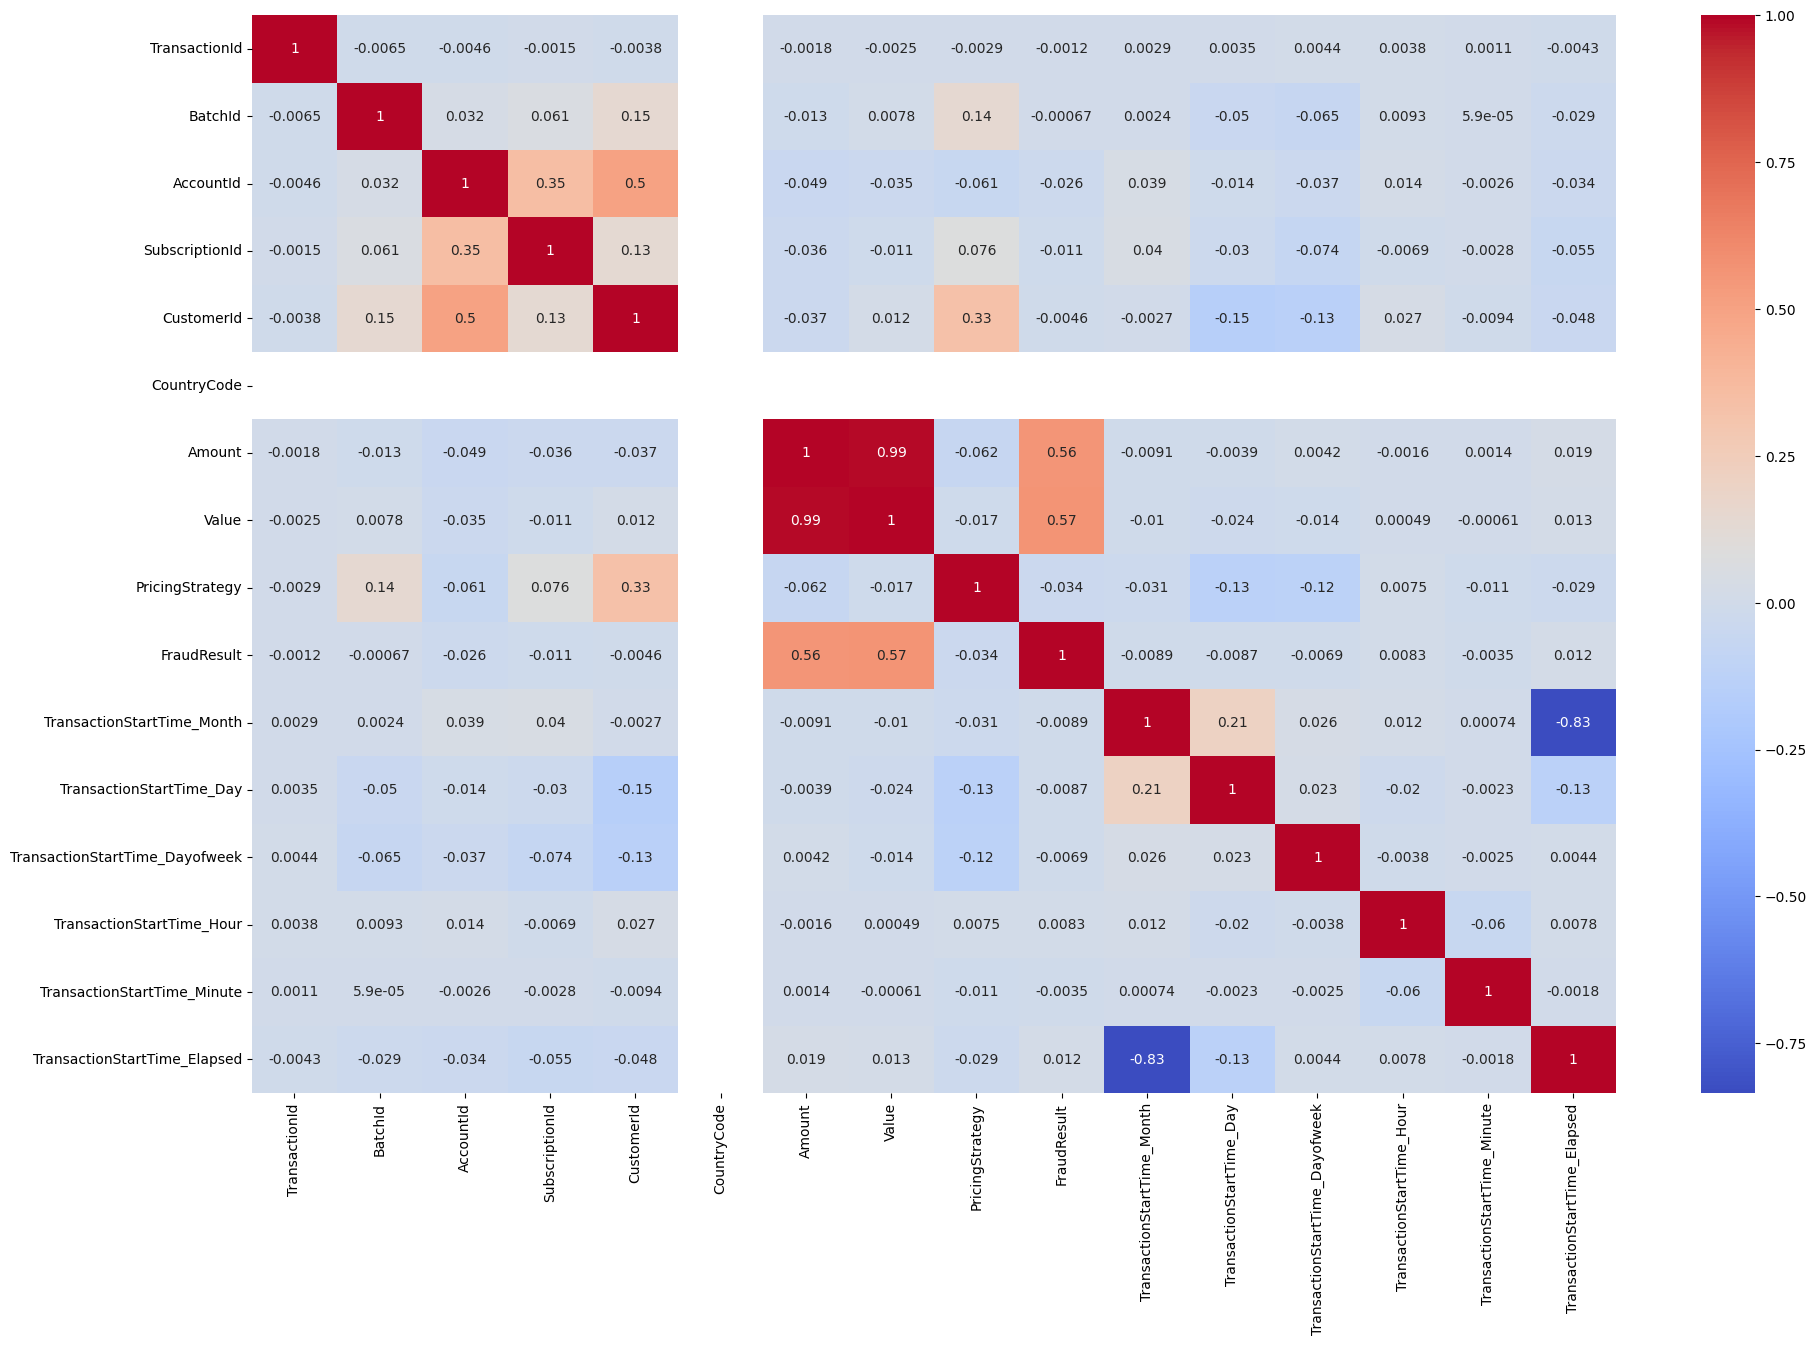

In [8]:
engineer.correlation_matrix()

But the extracted columns are not highly correlated to drop off so we use as it is.

In [9]:
# Encode boolean features
df = engineer.encode_boolean_features()

# Encodecategorical features
df = engineer.encode_categorical_features()

No NaN values found in the encoded DataFrame.


In [10]:
# Apply label encoding
label_encode_columns = ['Pricingstrategy']
df = engineer.apply_label_encoding(label_encode_columns)

In [11]:
# Normalize and standardize specified columns
normalize_cols = ['Amount']
standardize_cols = []
df = engineer.normalize_and_standardize(normalize_cols, standardize_cols)

In [12]:
# Balance the classes
balanced_data, X_test, y_test = engineer.balance_classes('FraudResult')

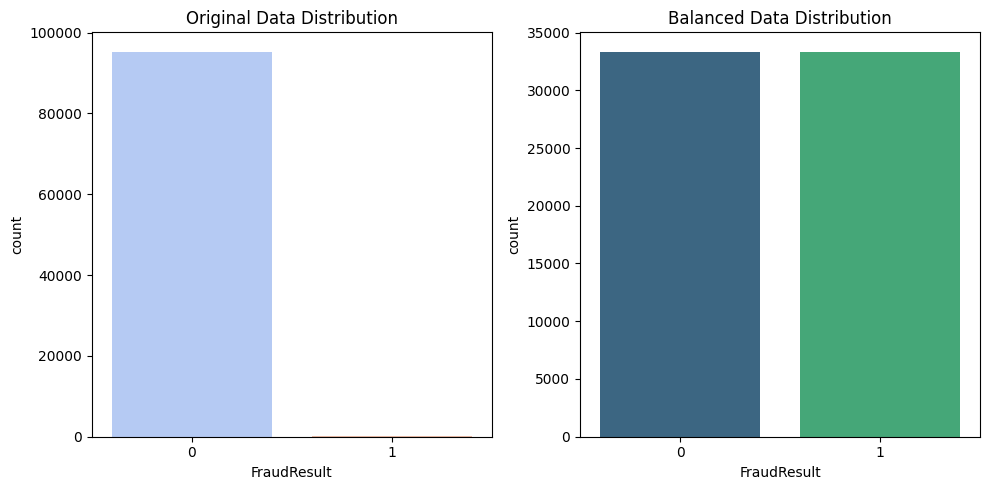

In [13]:
# Visualize class distribution
engineer.visualize_class_distribution(balanced_data, 'FraudResult')

In [14]:
# Calculate IV and WoE
final_summary, key_points = engineer.calculate_iv_woe(balanced_data, 'FraudResult')

In [15]:
# Print the final summary
print("Final Summary:")
print(final_summary)

Final Summary:
                        Variable        IV  \
0                  TransactionId  0.023938   
1                        BatchId  0.058147   
2                      AccountId  2.759731   
3                 SubscriptionId  9.598825   
4                     CustomerId  0.812503   
..                           ...       ...   
56  ProductCategory_utility_bill  0.020286   
57                   ChannelId_1  0.019673   
58                   ChannelId_2  4.554556   
59                   ChannelId_3  2.180948   
60                   ChannelId_5  7.751106   

                                                  WoE  
0   [0.7460732984293195, 0.9035591274397244, 0.984...  
1   [0.744145051624276, 1.0160326941213456, 0.9440...  
2   [0.34902353530295444, 0.43442098528470885, 0.2...  
3   [0.6530362389813908, 1.001432664756447, 0.1801...  
4   [0.47019545951195824, 1.1925876902713437, 0.43...  
..                                                ...  
56           [1.0330205074730623, 0.3856

In [18]:
# Print key points and suggestions
print("\nKey points and suggestions:")
for point in key_points:
    print(point)


Key points and suggestions:
TransactionId: IV = 0.023938 - Medium predictive power.
BatchId: IV = 0.058147 - Medium predictive power.
AccountId: IV = 2.759731 - Suspicious predictive power. Check for overfitting or data leakage.
SubscriptionId: IV = 9.598825 - Suspicious predictive power. Check for overfitting or data leakage.
CustomerId: IV = 0.812503 - Suspicious predictive power. Check for overfitting or data leakage.
CountryCode: IV = 0.000000 - Not useful for prediction.
Amount: IV = 6588.974075 - Suspicious predictive power. Check for overfitting or data leakage.
Value: IV = 4773.497189 - Suspicious predictive power. Check for overfitting or data leakage.
TransactionStartTime: IV = 1.011489 - Suspicious predictive power. Check for overfitting or data leakage.
PricingStrategy: IV = 0.239126 - Medium predictive power.
TransactionStartTime_Month: IV = 0.194675 - Medium predictive power.
TransactionStartTime_Day: IV = 0.385284 - Strong predictive power.
TransactionStartTime_Dayofwee

In [19]:
# Drop columns with low IV
cols_to_drop = engineer.drop_unused_columns(final_summary, threshold=0.02)
print("\nColumns to drop:")
print(cols_to_drop)


Columns to drop:
['CountryCode', 'TransactionStartTime_Is_year_start', 'CurrencyCode_UGX', 'ProviderId_2', 'ProductId_5', 'ProductId_12', 'ProductId_16', 'ProductId_21', 'ProductId_22', 'ProductId_23', 'ProductId_27', 'ProductCategory_other', 'ProductCategory_transport', 'ChannelId_1']


In [20]:
# Drop the columns from the DataFrame
balanced_data = balanced_data.drop(columns=cols_to_drop, axis=1)

In [21]:
# Set index to CustomerId
balanced_data = balanced_data.set_index('CustomerId')

In [22]:
# Save the processed data
balanced_data.to_csv('../data/processed/feature_engineered_data.csv', index=True)